In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# K-Means Clustering

In [2]:
house=pd.read_csv('/content/sample_data/california_housing_test.csv')
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


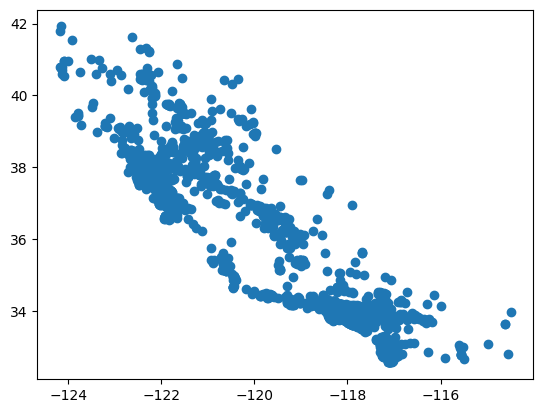

In [3]:
x=house['longitude']
y=house['latitude']
plt.scatter(x,y)

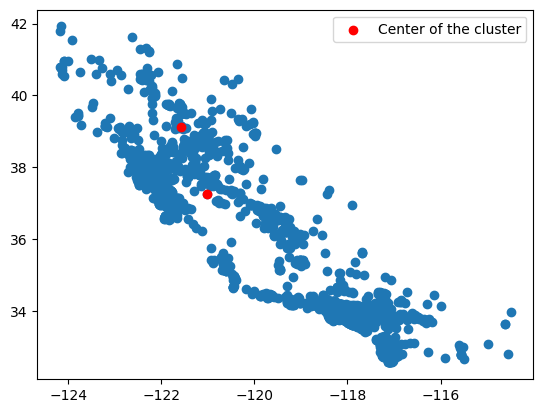

In [4]:
# Select initial position of the cluster centroids
k=2 # number of cluster
initial_position_index = np.random.choice(np.arange(3000), size=k, replace=False) # randomly choose index
centroids=[(x[i],y[i]) for i in initial_position_index]  # position of the centroids
# plotting data points and centroids
plt.scatter(x,y)
x_centers=[x_center for x_center,y_center in centroids]
y_centers=[y_center for x_center,y_center in centroids]
plt.scatter(x_centers, y_centers, c='r' , label='Center of the cluster')
plt.legend()

In [5]:
# We will use Euclidian distance to find the nearest cluster
def distance(dx,dy):
  return (dx**2+dy**2)**0.5

# Return list of cluster index [0, 1, 1, 3, 2, ...]
def classify(x_data, y_data, centroids):
  N=len(x_data)
  cluster=np.zeros(N)
  for i in range(N):
    x,y = x_data[i],y_data[i]
    distance_list = [distance(x_center-x, y_center-y) for (x_center,y_center) in centroids]
    cluster[i]=np.argmin(distance_list) # Find the minimum argument
  return cluster


In [6]:
cluster=classify(x,y,centroids) # return list of nearest clusters
cluster

array([0., 0., 0., ..., 0., 0., 0.])

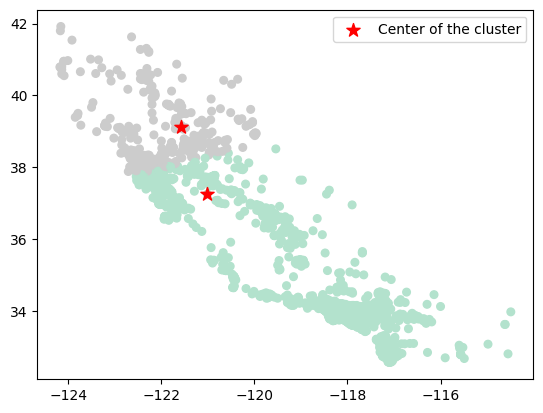

In [7]:
plt.scatter(x, y, c=cluster, cmap='Pastel2', s=30)
x_centers=[x_center for x_center,y_center in centroids]
y_centers=[y_center for x_center,y_center in centroids]
plt.scatter(x_centers, y_centers, c='r', label='Center of the cluster', marker='*', s=100)
plt.legend()

In [8]:
# Find the next center of the clusters

def next_center(x_data,y_data,cluster_list,k):
  center_list=[]
  for i in range(k):
    x_next=np.mean(x[cluster_list==i])
    y_next=np.mean(y[cluster_list==i])
    center_list.append((x_next,y_next))
  return center_list

In [9]:
centroids=next_center(x,y,cluster,2)
centroids

[(-119.15438831886347, 35.037861089187054),
 (-121.9536051502146, 38.88461373390559)]

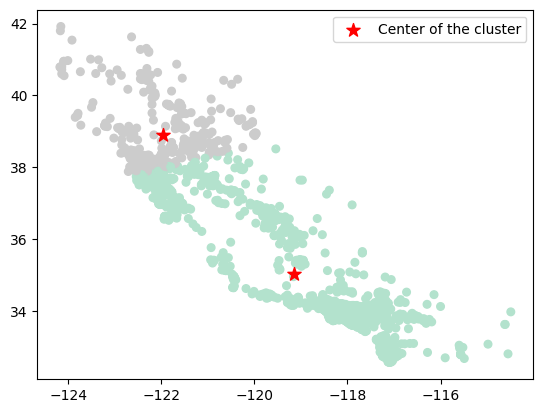

In [10]:
plt.scatter(x, y, c=cluster, cmap='Pastel2', s=30)
x_centers=[x_center for x_center,y_center in centroids]
y_centers=[y_center for x_center,y_center in centroids]
plt.scatter(x_centers, y_centers, c='r', label='Center of the cluster', marker='*', s=100)
plt.legend()

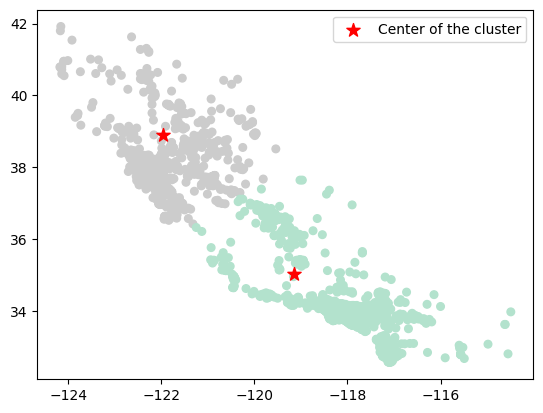

In [11]:
cluster=classify(x,y,centroids)
plt.scatter(x, y, c=cluster, cmap='Pastel2', s=30)
x_centers=[x_center for x_center,y_center in centroids]
y_centers=[y_center for x_center,y_center in centroids]
plt.scatter(x_centers, y_centers, c='r', label='Center of the cluster', marker='*', s=100)
plt.legend()

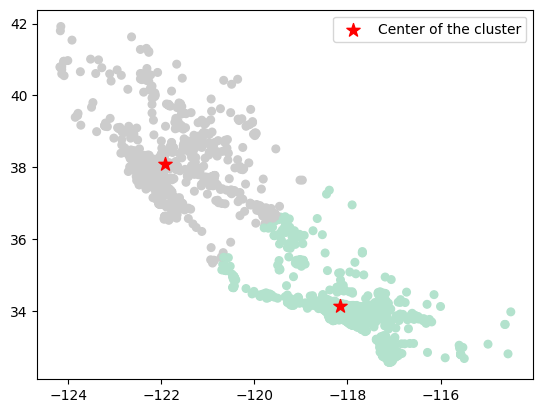

In [12]:
centroids=next_center(x,y,cluster,2)
cluster=classify(x,y,centroids)
plt.scatter(x, y, c=cluster, cmap='Pastel2', s=30)
x_centers=[x_center for x_center,y_center in centroids]
y_centers=[y_center for x_center,y_center in centroids]
plt.scatter(x_centers, y_centers, c='r', label='Center of the cluster', marker='*', s=100)
plt.legend()

In [13]:
def plot_K_Means(x_data,y_data,cluster,centroids,k=0,iter=0):
  plt.scatter(x_data, y_data, c=cluster, cmap='Pastel2', s=30)
  x_centers=[x_center for x_center,y_center in centroids]
  y_centers=[y_center for x_center,y_center in centroids]
  plt.scatter(x_centers, y_centers, c='r', label='Center of the cluster', marker='*', s=100)
  plt.legend()
  plt.title('K-Means Clustering(k='+str(k)+', iter='+str(iter)+')')
  plt.show()

def K_Means(x_data,y_data,k,iter=5,plot=True):
  N=len(x_data)
  initial_position_index = np.random.choice(np.arange(N), size=k, replace=False)
  centroids=[(x_data[i],y_data[i]) for i in initial_position_index]
  cluster=classify(x,y,centroids)
  if plot==True:
    plot_K_Means(x_data,y_data,cluster,centroids,k=k,iter=0)
  for i in range(1,iter):
    centroids=next_center(x,y,cluster,k)
    cluster=classify(x,y,centroids)
    if plot==True:
      plot_K_Means(x_data,y_data,cluster,centroids,k=k,iter=i)
  return cluster, centroids

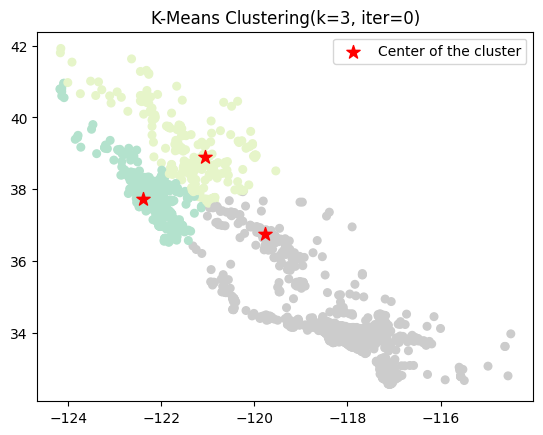

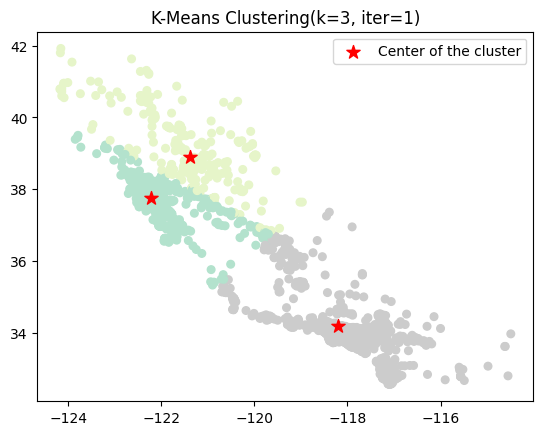

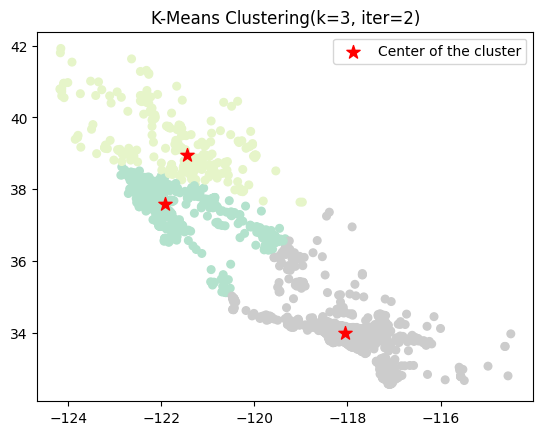

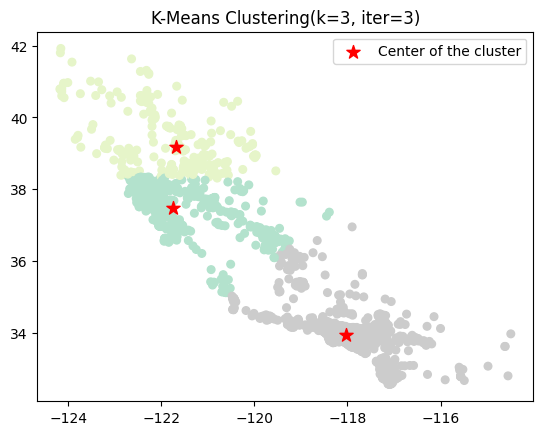

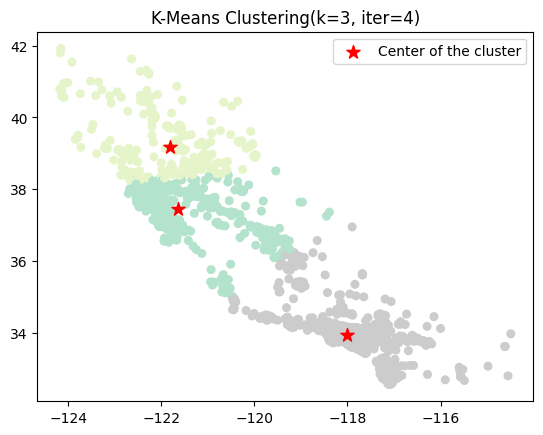

(array([0., 2., 2., ..., 0., 2., 2.]),
 [(-121.65, 37.44786243386244),
  (-121.81380116959062, 39.182631578947365),
  (-118.00819030939871, 33.92730881494454)])

In [14]:
K_Means(x,y,3)

# Elbow method

How can we find optimal k?

We will use Within-Cluster Sum of Square(WCSS) as a error funtcion(loss funtion)

WCSS will decrease as we increase k, but we might find optimal k

In [15]:
def WCSS(x_data,y_data,cluster,centroids):
  result=0
  for index,(x_center,y_center) in enumerate(centroids):
    SS=np.sum((x_data[cluster==index]-x_center)**2)+np.sum((y_data[cluster==index]-y_center)**2)
  result+=SS
  return result

In [16]:
ks=np.arange(2,11)
WCSS_matrix=np.zeros([9,30])
for index,k in enumerate(ks): # repeat over different ks
  for j in range(30): # repeat 30 times to get the ensemble average
    cluster,centroids=K_Means(x,y,k,iter=7,plot=False)
    WCSS_matrix[index,j]=WCSS(x,y,cluster,centroids)

Text(0, 0.5, 'WCSS')

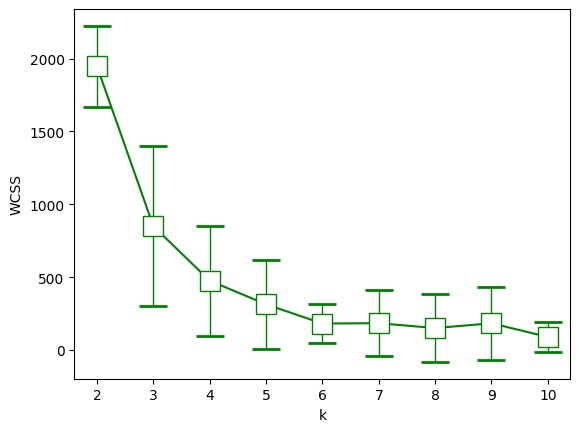

In [17]:
means=WCSS_matrix.mean(axis=1)
stds=WCSS_matrix.std(axis=1)
plt.errorbar(x=ks, y=means, yerr=stds, ecolor='g',elinewidth=1, c='g',marker='s',markersize=15,markerfacecolor='w', capsize=10, capthick=2)
plt.xlabel('k')
plt.ylabel('WCSS')

when k is 5 or 8, WCSS significantly decreases

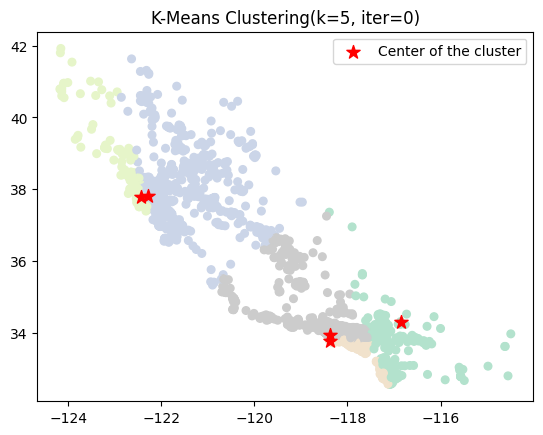

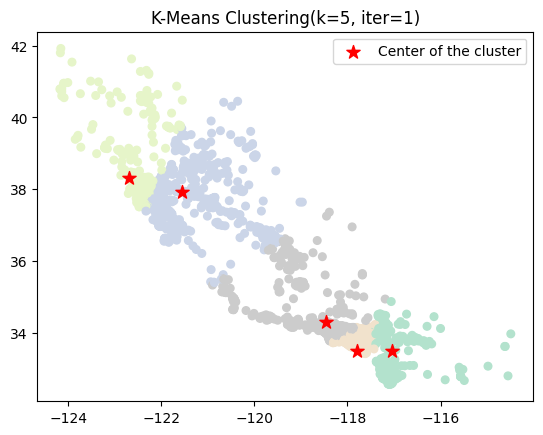

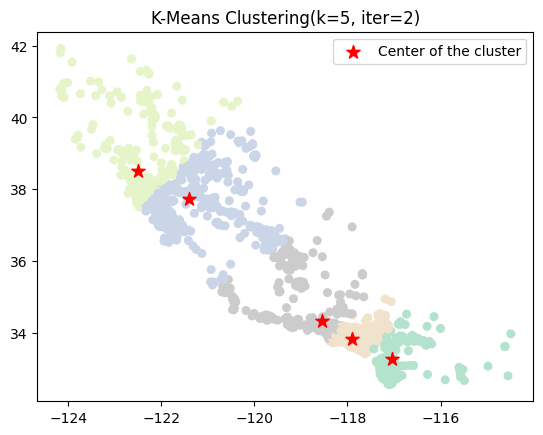

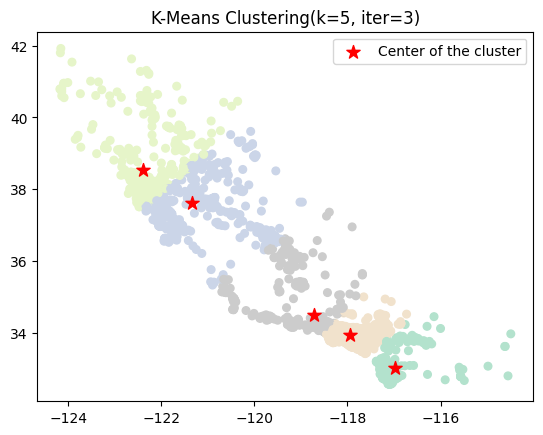

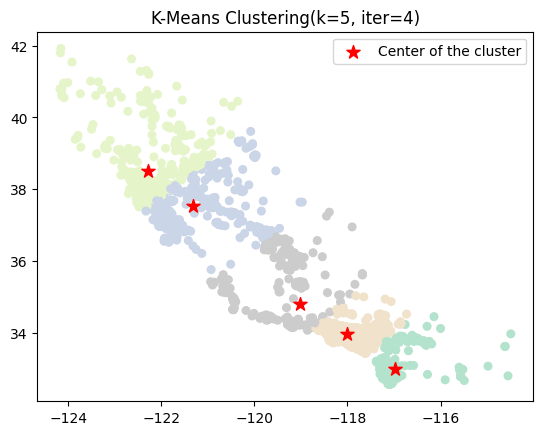

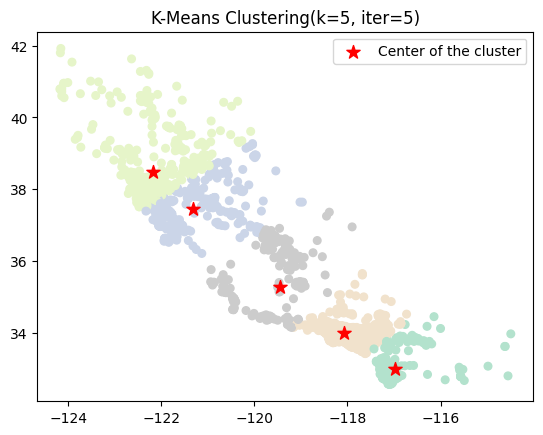

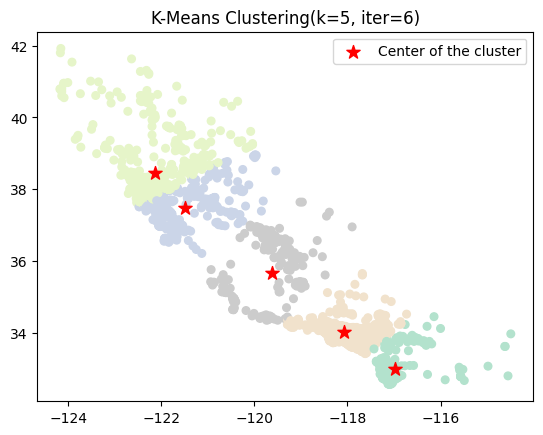

(array([1., 3., 3., ..., 4., 3., 4.]),
 [(-116.97176870748298, 32.98700680272109),
  (-121.48528260869566, 37.48019565217392),
  (-122.14648226950355, 38.45733333333333),
  (-118.08349056603774, 34.0092216981132),
  (-119.62527881040893, 35.668959107806685)])

In [18]:
K_Means(x,y,5,iter=7,plot=True)

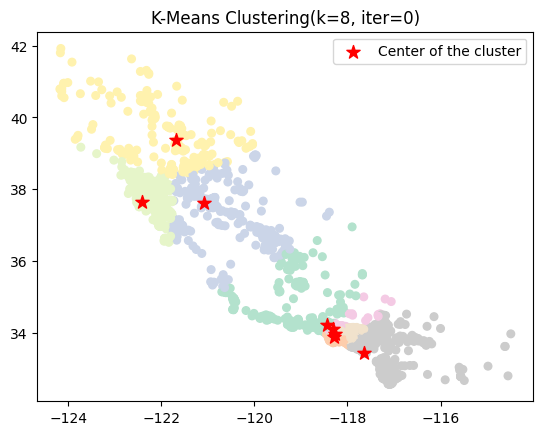

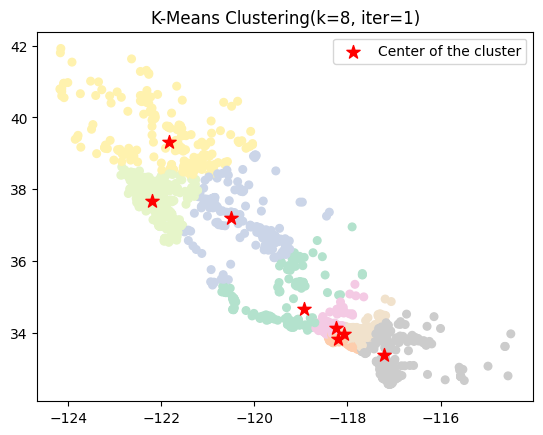

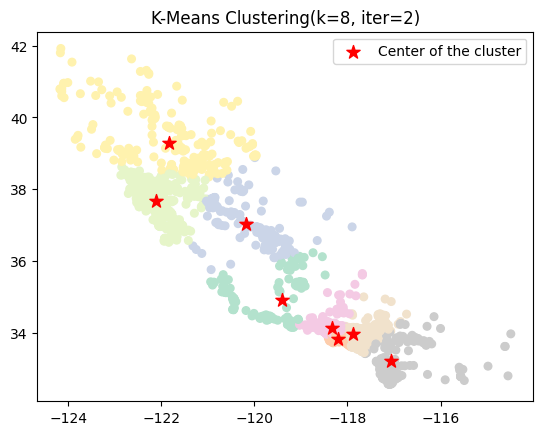

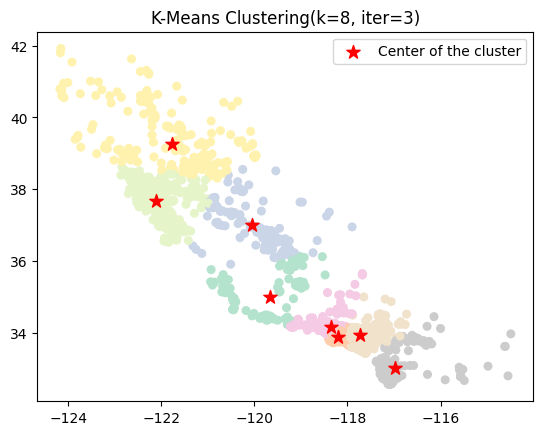

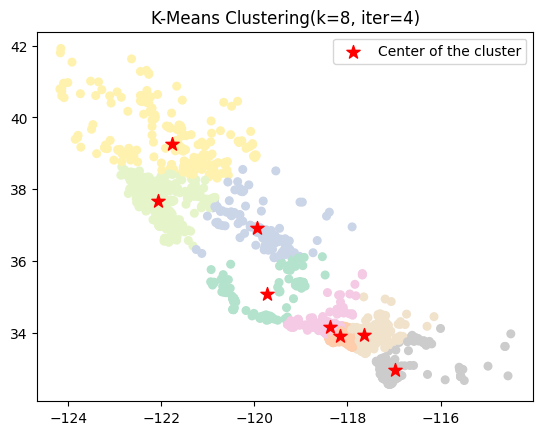

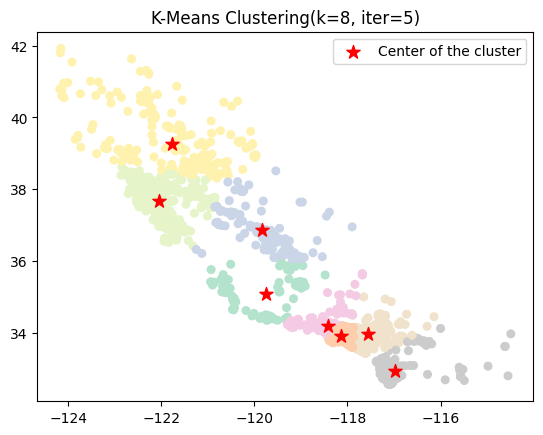

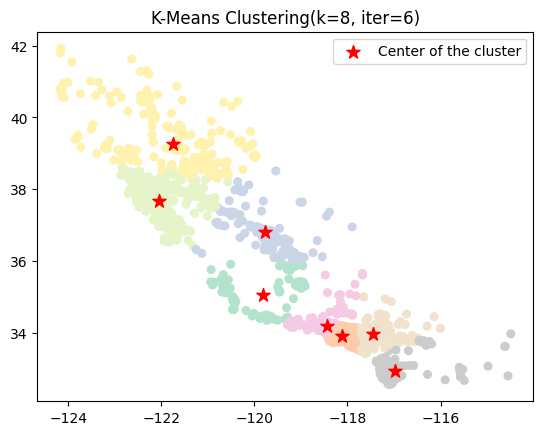

(array([4., 3., 1., ..., 2., 6., 0.]),
 [(-119.81118110236221, 35.041889763779515),
  (-118.11547368421054, 33.919383458646614),
  (-119.77022222222222, 36.79772222222222),
  (-118.43289743589742, 34.19230769230769),
  (-122.04936090225564, 37.66421052631579),
  (-121.75647249190939, 39.26252427184466),
  (-117.4615625, 33.97578125),
  (-116.97825454545453, 32.92694545454546)])

In [19]:
K_Means(x,y,8,iter=7,plot=True)

# Hierarchical Clustering

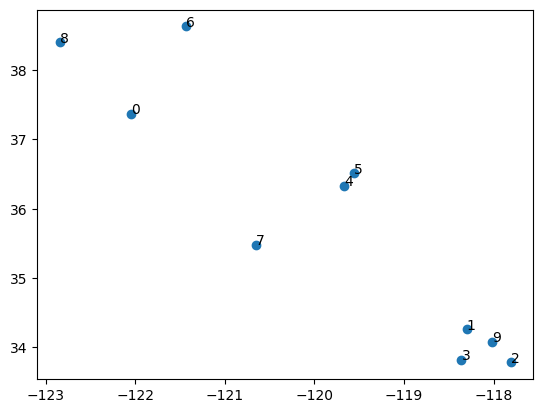

In [20]:
# we will use only first 10 data from the california housing location data
test_x=x[:10]
test_y=y[:10]
plt.scatter(test_x,test_y)
for idx in np.arange(10):
  plt.annotate(idx, (test_x[idx], test_y[idx]))

In [21]:
def minimum_distance(clust1,clust2):
  result=[]
  for x1,y1 in clust1:
    for x2,y2 in clust2:
      result.append(((x1-x2)**2+(y1-y2)**2)**0.5)
  return np.min(result)

def similarity_measure(x,y,cluster):
  sorted_cluster=sorted(set(cluster))
  N=len(sorted_cluster)
  distance_matrix=np.zeros([N,N])
  cluster_list=[list(zip(x[cluster==i], y[cluster==i])) for i in sorted_cluster]
  for idx,clust_1 in enumerate(cluster_list):
    for jdx,clust_2 in enumerate(cluster_list):
      if idx==jdx:
        distance_matrix[idx,jdx]=1e10
      else:
        distance_matrix[idx,jdx]=minimum_distance(clust_1,clust_2)
  n,m=np.unravel_index(np.argmin(distance_matrix, axis=None), distance_matrix.shape)
  n,m=min(sorted_cluster[n],sorted_cluster[m]),max(sorted_cluster[n],sorted_cluster[m])
  cluster[cluster==m]=n
  return cluster


In [22]:
cluster=np.arange(10)
similarity_measure(test_x,test_y,cluster)

array([0, 1, 2, 3, 4, 4, 6, 7, 8, 9])

In [23]:
cluster=np.arange(10)
cluster_matrix=np.zeros([10,10])
cluster_matrix[0]=cluster
for i in range(1,10):
  cluster=similarity_measure(test_x,test_y,cluster)
  print(cluster)
  cluster_matrix[i]=cluster

[0 1 2 3 4 4 6 7 8 9]
[0 1 2 3 4 4 6 7 8 1]
[0 1 1 3 4 4 6 7 8 1]
[0 1 1 1 4 4 6 7 8 1]
[0 1 1 1 4 4 6 4 8 1]
[0 1 1 1 4 4 6 4 0 1]
[0 1 1 1 4 4 0 4 0 1]
[0 1 1 1 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0]


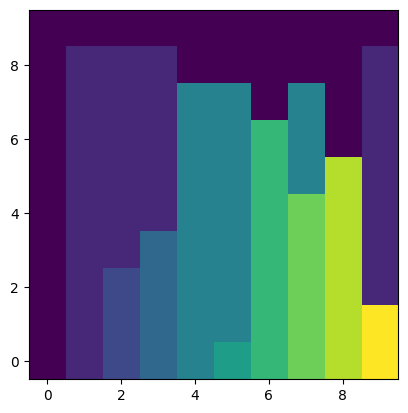

In [24]:
plt.imshow(cluster_matrix,origin='lower')

Plot the hierarchical dendrogram

In [25]:
import plotly.figure_factory as ff
ff.create_dendrogram(np.c_[test_x,test_y], color_threshold=1.5)